In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [3]:
model = load_model('lstm_multivariate_forex_12Timestep13EPOCH64BATCH_architecturenum1.h5', compile=False)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [4]:
# Buat scaler yang sama dengan saat training (asumsi pakai MinMaxScaler 0-1)
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
#Dummy data bossku

input_data = [
    [0.86579, 0.86769, 0.86151, 0.86265],
    [0.86229, 0.86302, 0.85376, 0.85376],
    [0.85398, 0.85609, 0.84946, 0.85162],
    [0.85022, 0.85334, 0.84887, 0.85213],
    [0.85078, 0.85411, 0.84700, 0.84760],
    [0.84706, 0.84849, 0.84554, 0.84713],
    [0.84712, 0.84835, 0.84087, 0.84157],
    [0.84133, 0.84513, 0.84088, 0.84212],
    [0.84119, 0.84929, 0.83997, 0.84722],
    [0.84625, 0.85099, 0.84592, 0.84988],
    [0.84930, 0.85368, 0.84819, 0.85145],
    [0.85044, 0.85370, 0.84776, 0.85022],
    # [0.84975, 0.85181, 0.84622, 0.84640],
    # [0.84596, 0.84902, 0.84332, 0.84390],
    # [0.84357, 0.84753, 0.83734, 0.84299],
    # [0.84341, 0.84939, 0.84223, 0.84926],
    # [0.84868, 0.84982, 0.84558, 0.84684],
]


In [6]:
# Cek jumlah input
if len(input_data) != 12:
    raise ValueError("Harus ada tepat 12 bar OHLC sebagai input!")

In [7]:
#  Convert ke numpy dan normalisasi
ohlc_input = np.array(input_data)
scaler.fit(ohlc_input)  # WARNING: ganti ini dengan scaler asli saat training (load dari joblib jika ada)
ohlc_scaled = scaler.transform(ohlc_input)


In [8]:
# Ubah ke shape yang dibutuhkan LSTM → (1, 12, 4)
X_input = ohlc_scaled.reshape(1, 12, 4)


In [9]:
# Prediksi
prediction_scaled = model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [10]:
#  Inverse transform hasil prediksi → (5, 4)
prediction_flat = prediction_scaled.reshape(-1, 4)
prediction = scaler.inverse_transform(prediction_flat)


In [11]:
columns = ['Open', 'High', 'Low', 'Close']
df_pred = pd.DataFrame(prediction, columns=columns)
print("Prediksi OHLC untuk 5 bar ke depan:")
print(df_pred)

Prediksi OHLC untuk 5 bar ke depan:
       Open      High       Low     Close
0  0.849374  0.852946  0.847193  0.848862
1  0.849441  0.852622  0.847116  0.848819
2  0.849762  0.852682  0.847175  0.848347
3  0.848856  0.852713  0.847303  0.848657
4  0.849311  0.852672  0.847364  0.848779


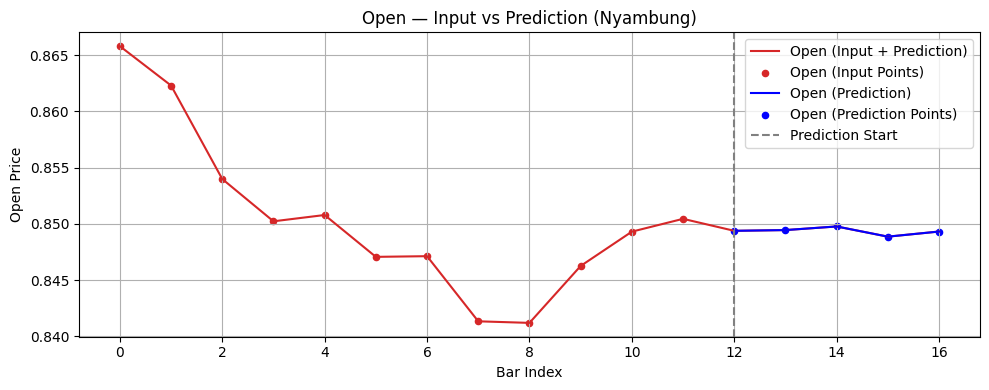

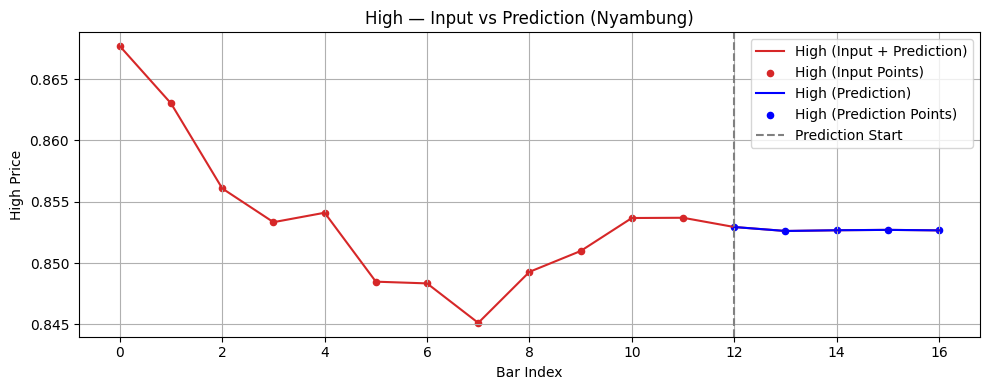

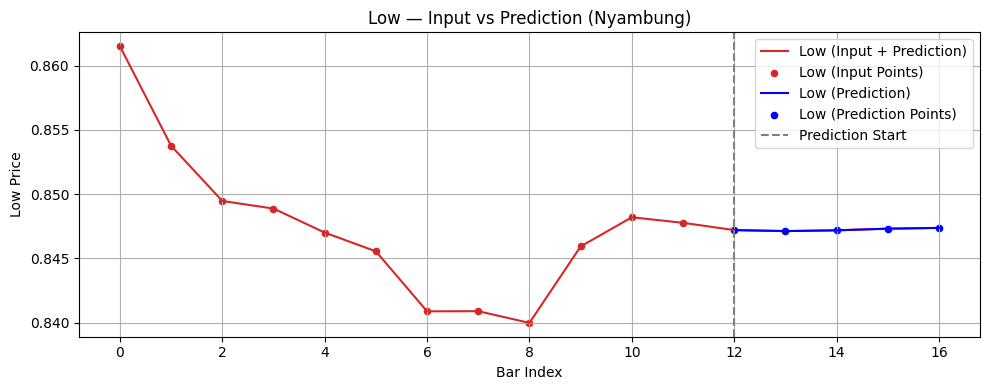

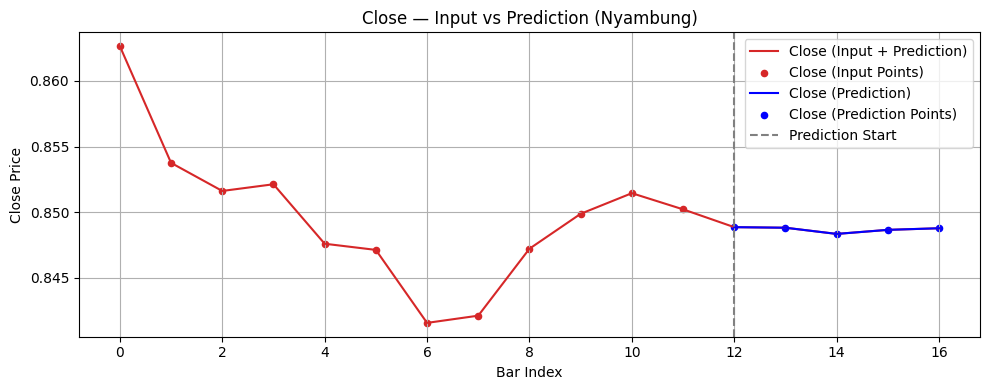

In [12]:
# tanya pak surya bel

feature_names = ['Open', 'High', 'Low', 'Close']
input_colors = ['tab:red', 'tab:red', 'tab:red', 'tab:red']  # Warna untuk input
prediction_color = 'blue'  # Warna untuk prediksi

# Plot input dan prediksi dengan warna berbeda
for i, name in enumerate(feature_names):
    full_series = np.concatenate([ohlc_input[:, i], prediction[:, i]])  # Gabungkan input dan prediksi
    plt.figure(figsize=(10, 4))
    # Plot seluruh data sebagai garis kontinu
    plt.plot(range(len(full_series)), full_series, label=f'{name} (Input + Prediction)', color=input_colors[i])
    # Tambahkan titik untuk input
    plt.scatter(range(12), ohlc_input[:, i], color=input_colors[i], s=20, label=f'{name} (Input Points)')
    # Tambahkan titik dan garis ulang untuk prediksi
    plt.plot(range(12, len(full_series)), prediction[:, i], color=prediction_color, label=f'{name} (Prediction)')
    plt.scatter(range(12, len(full_series)), prediction[:, i], color=prediction_color, s=20, label=f'{name} (Prediction Points)')
    # Garis vertikal untuk memisahkan input & prediksi
    plt.axvline(x=12, color='gray', linestyle='--', label='Prediction Start')
    plt.title(f'{name} — Input vs Prediction (Nyambung)')
    plt.xlabel('Bar Index')
    plt.ylabel(f'{name} Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:

# . Buat DataFrame dari input_data
columns = ['Open', 'High', 'Low', 'Close']
df_input = pd.DataFrame(input_data, columns=columns)

#  Tambahkan datetime index — misalnya dimulai dari 2023-01-01 09:00
df_input.index = pd.date_range(start='2023-01-01 09:00', periods=len(df_input), freq='5min')

#  Lihat hasilnya
print(df_input)


                        Open     High      Low    Close
2023-01-01 09:00:00  0.86579  0.86769  0.86151  0.86265
2023-01-01 09:05:00  0.86229  0.86302  0.85376  0.85376
2023-01-01 09:10:00  0.85398  0.85609  0.84946  0.85162
2023-01-01 09:15:00  0.85022  0.85334  0.84887  0.85213
2023-01-01 09:20:00  0.85078  0.85411  0.84700  0.84760
2023-01-01 09:25:00  0.84706  0.84849  0.84554  0.84713
2023-01-01 09:30:00  0.84712  0.84835  0.84087  0.84157
2023-01-01 09:35:00  0.84133  0.84513  0.84088  0.84212
2023-01-01 09:40:00  0.84119  0.84929  0.83997  0.84722
2023-01-01 09:45:00  0.84625  0.85099  0.84592  0.84988
2023-01-01 09:50:00  0.84930  0.85368  0.84819  0.85145
2023-01-01 09:55:00  0.85044  0.85370  0.84776  0.85022


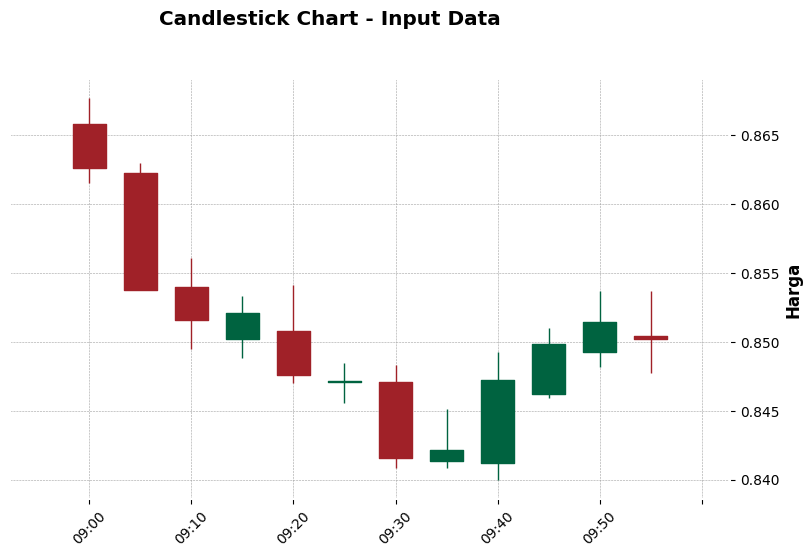

In [14]:


mpf.plot(
    df_input,
    type='candle',
    style='charles',
    title='Candlestick Chart - Input Data',
    ylabel='Harga',
    volume=False,
    figsize=(10, 6)
)


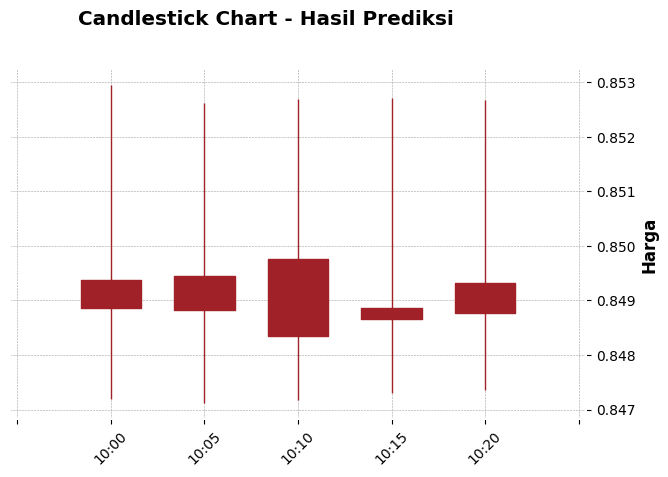

In [15]:

# Asumsi: prediction sudah dalam format (5, 4) dan variabel `prediction` aktif
columns = ['Open', 'High', 'Low', 'Close']
df_prediction = pd.DataFrame(prediction, columns=columns)

# Tambahkan datetime index dummy
df_prediction.index = pd.date_range(start='2023-01-01 10:00', periods=len(df_prediction), freq='5min')

# Plot candlestick
mpf.plot(
    df_prediction,
    type='candle',
    style='charles',
    title='Candlestick Chart - Hasil Prediksi',
    ylabel='Harga',
    volume=False,
    figsize=(8, 5)
)


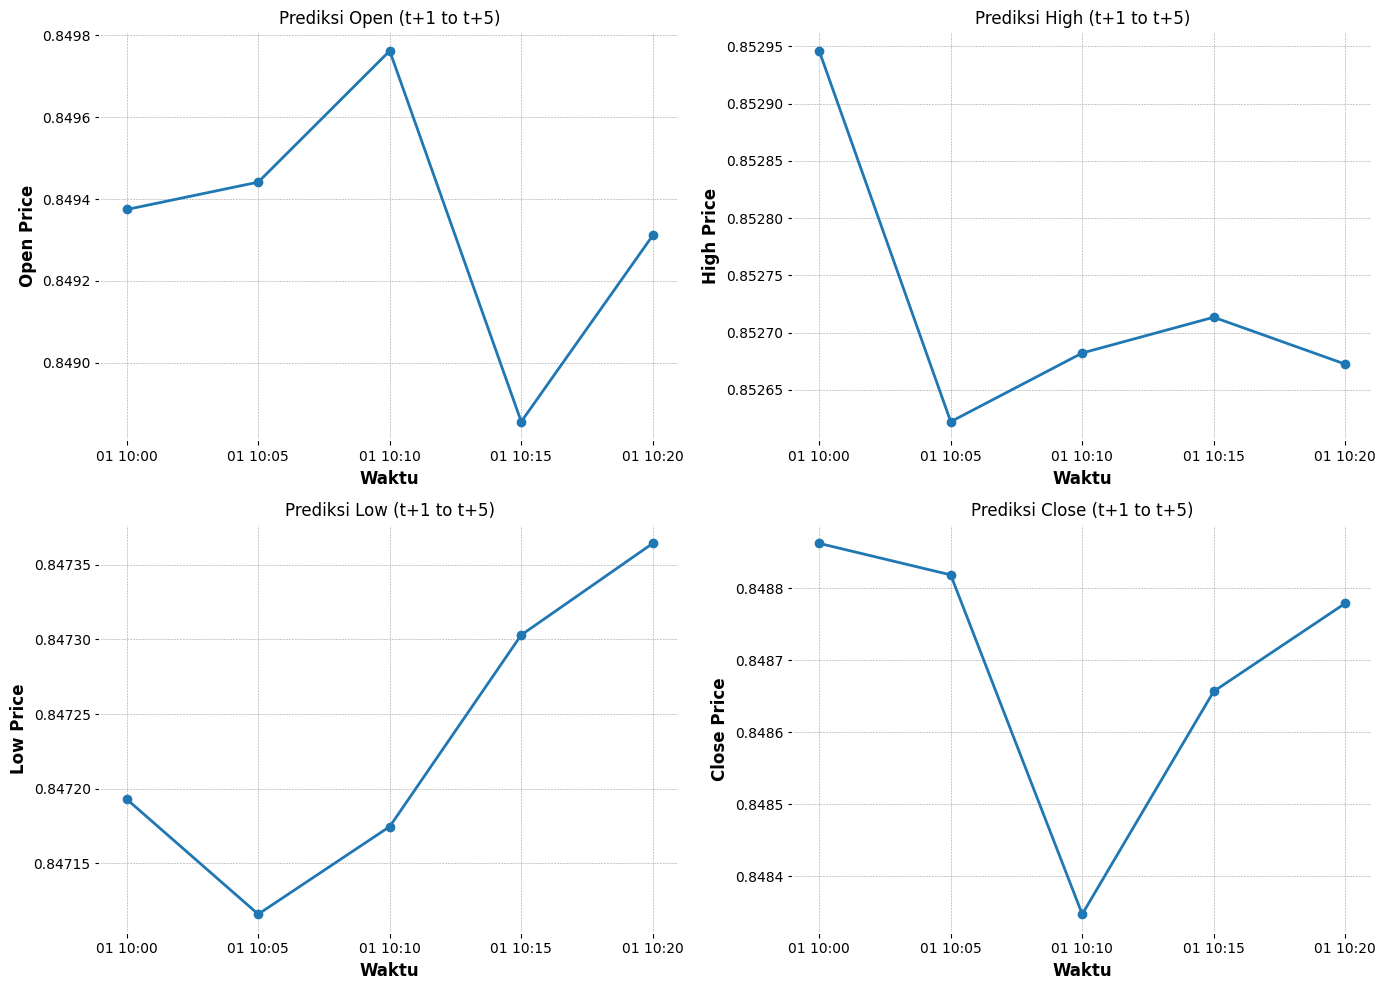

In [16]:

columns = ['Open', 'High', 'Low', 'Close']
df_prediction = pd.DataFrame(prediction, columns=columns)

# Tambahkan index waktu (optional)
df_prediction.index = pd.date_range(start='2023-01-01 10:00', periods=5, freq='5min')

# Plot 4 fitur dalam 4 subplot terpisah
plt.figure(figsize=(14, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i+1)
    plt.plot(df_prediction.index, df_prediction[col], marker='o')
    plt.title(f'Prediksi {col} (t+1 to t+5)')
    plt.xlabel('Waktu')
    plt.ylabel(f'{col} Price')
    plt.grid(True)

plt.tight_layout()
plt.show()
